In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, DepthwiseConv2D, BatchNormalization, Activation, Flatten, ZeroPadding2D

In [ ]:
def _conv_block(inputs, filters,kernel, strides):
  x = ZeroPadding2D(padding=((0, 1), (0, 1)))(inputs)
  x = keras.layers.Conv2D(filters, kernel, padding='valid',use_bias=False,strides=strides)(x)
  x = keras.layers.BatchNormalization()(x)
  return keras.layers.ReLU(6.)(x)

In [ ]:
def _depthwise_conv_block(inputs, pointwise_conv_filters,strides):
  if strides == (1, 1):
    x = inputs
  else:
    x = ZeroPadding2D(((0, 1), (0, 1)))(inputs)
  x = keras.layers.DepthwiseConv2D((3, 3),padding='same' if strides == (1, 1) else 'valid', use_bias=False, strides=strides)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU(6.)(x)

  x = keras.layers.Conv2D(pointwise_conv_filters, (1, 1),padding='same',use_bias=False,strides=(1, 1))(x)
  x = keras.layers.BatchNormalization()(x)
  return keras.layers.ReLU(6.)(x)

In [ ]:
    inputs = keras.layers.Input( shape=( 224 , 224 , 3) )
    x = _conv_block(inputs, 32, 3,strides=(2, 2))
    x = _depthwise_conv_block(x, 64, strides=(1, 1))

    x = _depthwise_conv_block(x, 128,strides=(2, 2))
    x = _depthwise_conv_block(x, 128, strides=(1, 1))

    x = _depthwise_conv_block(x, 256, strides=(2, 2))
    x = _depthwise_conv_block(x, 256, strides=(1, 1))

    x = _depthwise_conv_block(x, 512, strides=(2, 2))

    x = _depthwise_conv_block(x, 512, strides=(1, 1))
    x = _depthwise_conv_block(x, 512, strides=(1, 1))
    x = _depthwise_conv_block(x, 512, strides=(1, 1))
    x = _depthwise_conv_block(x, 512, strides=(1, 1))
    x = _depthwise_conv_block(x, 512, strides=(1, 1))

    x = _depthwise_conv_block(x, 1024, strides=(2, 2))
    x = _depthwise_conv_block(x, 1024, strides=(1, 1))

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output_1 = keras.layers.Dense(1, activation='sigmoid')(x)
    output_2 = keras.layers.Dense(4, activation='linear')(x)
    output_3 = keras.layers.Dense(64, activation='linear')(x)
    model = Model(inputs, outputs=[output_1, output_2, output_3])

    model.compile(loss=[tf.keras.losses.BinaryCrossentropy() ,tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanSquaredError()],optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['acc'])
    model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 32) 864         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 32) 128         conv2d_1[0][0]                   
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.save('/content/drive/MyDrive/Models/TRY_01.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Models/TRY_01.h5')
model.summary()

In [ ]:
for i,layer in enumerate(model.layers):
  print(i, layer.name)

In [ ]:
for layer in model.layers[:82]:
  layer.trainable = False

In [ ]:
model.compile(loss=[tf.keras.losses.BinaryCrossentropy() ,tf.keras.losses.MeanSquaredError(), tf.keras.losses.MeanSquaredError()],optimizer=keras.optimizers.Adam(lr=1e-3), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
X = np.load("/content/drive/MyDrive/NTHU-224/NTHU_224_PROPER.npy")
Y_1 = np.load("/content/drive/MyDrive/NTHU-224/NTHU_224_CS.npy")
Y_2 = np.load("/content/drive/MyDrive/NTHU-224/NTHU_224_BB.npy")
Y_3 = np.load("/content/drive/MyDrive/NTHU-224/NTHU_224_FLPOINTS.npy")

In [ ]:
history = model.fit(X, [Y_1, Y_2, Y_3], epochs=20, batch_size=64, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/20
122/122 [==============================] - 99s 393ms/step - loss: 17077.5953 - dense_loss: 0.0122 - dense_1_loss: 8293.5318 - dense_2_loss: 8784.0511 - dense_acc: 1.0000 - dense_1_acc: 0.4311 - dense_2_acc: 0.0768 - val_loss: 742.2597 - val_dense_loss: 1.9725e-09 - val_dense_1_loss: 439.5217 - val_dense_2_loss: 302.7380 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.8728 - val_dense_2_acc: 0.0382
Epoch 2/20
122/122 [==============================] - 45s 366ms/step - loss: 263.8913 - dense_loss: 5.6653e-09 - dense_1_loss: 150.7769 - dense_2_loss: 113.1144 - dense_acc: 1.0000 - dense_1_acc: 0.8183 - dense_2_acc: 0.2625 - val_loss: 189.5982 - val_dense_loss: 3.4185e-09 - val_dense_1_loss: 95.7206 - val_dense_2_loss: 93.8776 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.8728 - val_dense_2_acc: 0.0382
Epoch 3/20
122/122 [==============================] - 45s 367ms/step - loss: 136.5345 - dense_loss: 1.0083e-08 - dense_1_loss: 65.6181 - dense_2_loss: 70.9163 - dense_acc: 1.0000 - den

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'dense_loss', 'dense_1_loss', 'dense_2_loss', 'dense_acc', 'dense_1_acc', 'dense_2_acc', 'val_loss', 'val_dense_loss', 'val_dense_1_loss', 'val_dense_2_loss', 'val_dense_acc', 'val_dense_1_acc', 'val_dense_2_acc'])


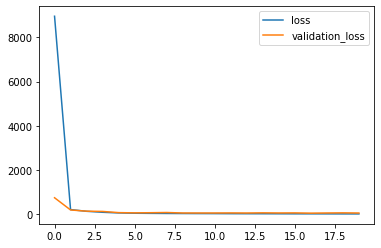

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation_loss'])

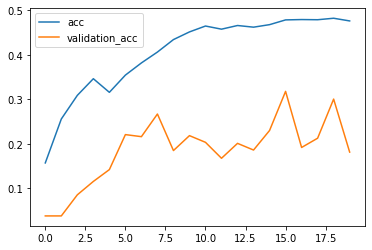

In [ ]:
plt.plot(history.history['dense_2_acc'])
plt.plot(history.history['val_dense_2_acc'])
plt.legend(['acc', 'validation_acc'])

In [ ]:
Early_Stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X, [Y_1, Y_2, Y_3], epochs=20, batch_size=64, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/20
122/122 [==============================] - 45s 366ms/step - loss: 9.8686 - dense_loss: 4.2725e-08 - dense_1_loss: 5.0128 - dense_2_loss: 4.8558 - dense_acc: 1.0000 - dense_1_acc: 0.9298 - dense_2_acc: 0.4729 - val_loss: 52.4991 - val_dense_loss: 4.5209e-09 - val_dense_1_loss: 36.1749 - val_dense_2_loss: 16.3241 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.9410 - val_dense_2_acc: 0.1630
Epoch 2/20
122/122 [==============================] - 44s 363ms/step - loss: 10.6902 - dense_loss: 4.6650e-08 - dense_1_loss: 5.5550 - dense_2_loss: 5.1352 - dense_acc: 1.0000 - dense_1_acc: 0.9265 - dense_2_acc: 0.4727 - val_loss: 66.1302 - val_dense_loss: 4.4149e-09 - val_dense_1_loss: 37.0987 - val_dense_2_loss: 29.0314 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.9676 - val_dense_2_acc: 0.2231
Epoch 3/20
122/122 [==============================] - 45s 366ms/step - loss: 9.0461 - dense_loss: 6.1769e-08 - dense_1_loss: 4.5392 - dense_2_loss: 4.5069 - dense_acc: 1.0000 - dense_1_acc: 0.9237 - 

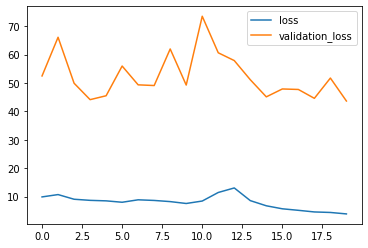

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation_loss'])

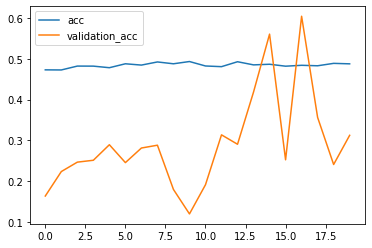

In [ ]:
plt.plot(history.history['dense_2_acc'])
plt.plot(history.history['val_dense_2_acc'])
plt.legend(['acc', 'validation_acc'])

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'dense_loss', 'dense_1_loss', 'dense_2_loss', 'dense_acc', 'dense_1_acc', 'dense_2_acc', 'val_loss', 'val_dense_loss', 'val_dense_1_loss', 'val_dense_2_loss', 'val_dense_acc', 'val_dense_1_acc', 'val_dense_2_acc'])


In [ ]:
model.compile(loss=[tf.keras.losses.BinaryCrossentropy() ,tf.keras.losses.Huber(delta=1.0), tf.keras.losses.Huber(delta=1.0)], optimizer=keras.optimizers.Adam(lr=1e-4), metrics=['acc'])
model.summary()

In [ ]:
history = model.fit(X, [Y_1, Y_2, Y_3], epochs=20, batch_size=64, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/20
122/122 [==============================] - 53s 383ms/step - loss: 1.0820 - dense_loss: 3.4099e-08 - dense_1_loss: 0.4489 - dense_2_loss: 0.6332 - dense_acc: 1.0000 - dense_1_acc: 0.9423 - dense_2_acc: 0.4943 - val_loss: 6.3197 - val_dense_loss: 2.7236e-09 - val_dense_1_loss: 4.0114 - val_dense_2_loss: 2.3083 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.9572 - val_dense_2_acc: 0.3734
Epoch 2/20
122/122 [==============================] - 45s 366ms/step - loss: 0.8713 - dense_loss: 2.4232e-08 - dense_1_loss: 0.3198 - dense_2_loss: 0.5514 - dense_acc: 1.0000 - dense_1_acc: 0.9503 - dense_2_acc: 0.4883 - val_loss: 5.9201 - val_dense_loss: 1.7411e-09 - val_dense_1_loss: 3.8208 - val_dense_2_loss: 2.0992 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.9572 - val_dense_2_acc: 0.3156
Epoch 3/20
122/122 [==============================] - 45s 369ms/step - loss: 0.8153 - dense_loss: 1.6967e-08 - dense_1_loss: 0.2914 - dense_2_loss: 0.5239 - dense_acc: 1.0000 - dense_1_acc: 0.9495 - dense_2

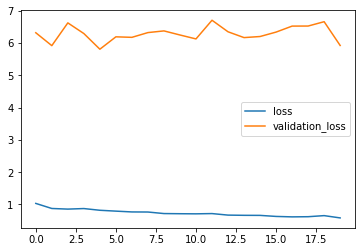

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation_loss'])

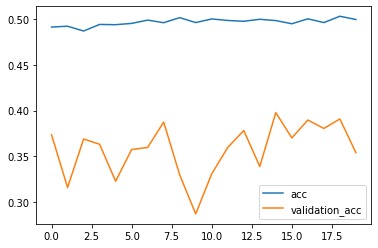

In [ ]:
plt.plot(history.history['dense_2_acc'])
plt.plot(history.history['val_dense_2_acc'])
plt.legend(['acc', 'validation_acc'])

In [ ]:
history = model.fit(X, [Y_1, Y_2, Y_3], epochs=20, batch_size=64, shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/20
122/122 [==============================] - 45s 372ms/step - loss: 0.6048 - dense_loss: 1.3979e-09 - dense_1_loss: 0.1958 - dense_2_loss: 0.4090 - dense_acc: 1.0000 - dense_1_acc: 0.9562 - dense_2_acc: 0.4993 - val_loss: 6.5041 - val_dense_loss: 2.8342e-10 - val_dense_1_loss: 4.1492 - val_dense_2_loss: 2.3549 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.9584 - val_dense_2_acc: 0.3572
Epoch 2/20
122/122 [==============================] - 45s 365ms/step - loss: 0.5823 - dense_loss: 1.4017e-09 - dense_1_loss: 0.1811 - dense_2_loss: 0.4012 - dense_acc: 1.0000 - dense_1_acc: 0.9593 - dense_2_acc: 0.5029 - val_loss: 6.2284 - val_dense_loss: 2.7091e-10 - val_dense_1_loss: 3.8995 - val_dense_2_loss: 2.3289 - val_dense_acc: 1.0000 - val_dense_1_acc: 0.9549 - val_dense_2_acc: 0.3757
Epoch 3/20
122/122 [==============================] - 45s 365ms/step - loss: 0.5665 - dense_loss: 1.4939e-09 - dense_1_loss: 0.1784 - dense_2_loss: 0.3881 - dense_acc: 1.0000 - dense_1_acc: 0.9620 - dense_2

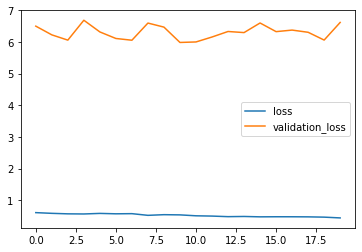

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation_loss'])

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'dense_loss', 'dense_1_loss', 'dense_2_loss', 'dense_dense_dense_dense_acc', 'dense_1_dense_1_dense_1_dense_1_acc', 'dense_2_dense_2_dense_2_dense_2_acc', 'val_loss', 'val_dense_loss', 'val_dense_1_loss', 'val_dense_2_loss', 'val_dense_dense_dense_dense_acc', 'val_dense_1_dense_1_dense_1_dense_1_acc', 'val_dense_2_dense_2_dense_2_dense_2_acc'])


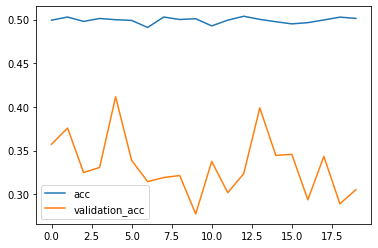

In [ ]:
plt.plot(history.history['dense_2_acc'])
plt.plot(history.history['val_dense_2_acc'])
plt.legend(['acc', 'validation_acc'])

In [ ]:
model.save('/content/drive/MyDrive/Models/TRY_01.h5')